# 가설 : 향후 2020년 하반기 안정적인 Symbol 구하고 감소한 Symbol 중 어느 시점을 기준으로 감소했는지 알아보겠다.

## 날짜 기준으로 가격이 증가한 시점, 감소한 시점 보기


## Symbol 중 증가, 감소 특징이 두드러진 Symbol 찾기

## 목차 
- 데이터 불러오기
- 데이터 전처리
- 그래프 그리기
- 결론

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## 데이터 불러오기

In [65]:
stock = pd.read_csv('D:/머신러닝 완벽가이드 데이터/e9938d2f36969a28b5cf15dfc17a77b3-402e4494a6a0cce7d1d1d543cb5d9ac7831c6d1b/e9938d2f36969a28b5cf15dfc17a77b3-402e4494a6a0cce7d1d1d543cb5d9ac7831c6d1b/stock.adj_close.csv')
stock.head(3)

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0


In [66]:
# 주식가격 실수형, 주식코드 문자형
stock.info()

# 해당 컬럼의 유형과 건수
stock['2018-06-01'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 569 entries, Symbol to 2020-09-18
dtypes: float64(568), object(1)
memory usage: 9.9+ MB


12850.0     7
6600.0      6
11800.0     6
12650.0     5
10500.0     5
           ..
102500.0    1
1578.0      1
70100.0     1
1847.0      1
6710.0      1
Name: 2018-06-01, Length: 1488, dtype: int64

## 데이터 전처리
 - null값 '0'으로 대체
 - 날짜 Datetime 으로 형변환

In [67]:
# null 갯수 확인 -> null을 '0'으로 대체
stock.isna().sum()
stock = stock.fillna(0)

In [68]:
stock.isna().sum()

Symbol        0
2018-06-01    0
2018-06-04    0
2018-06-05    0
2018-06-07    0
             ..
2020-09-14    0
2020-09-15    0
2020-09-16    0
2020-09-17    0
2020-09-18    0
Length: 569, dtype: int64

In [69]:
stock.shape


(2274, 569)

In [70]:
stock_T = stock.transpose()

In [76]:
stock_T.head(3)
stock_T.columns

RangeIndex(start=0, stop=2274, step=1)

In [84]:
# 첫번째 행을 컬럼으로 전환
stock_T_2 = stock_T.rename(columns=stock_T.iloc[0])
stock_T_2.head(3)
# Transpose()로 인덱스가 컬럼처럼

,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,0.0,7690.0,4970.0,6530.0,38600.0,13850.0,0.0,0.0,0.0
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,0.0,7700.0,4900.0,6870.0,36400.0,14250.0,0.0,0.0,0.0


In [85]:
# 0열을 DateTime으로 변환하기 위해 0행삭제 - DateTime 아닌 것이 섞여있음
stock_T_3=stock_T_2.drop(stock_T_2.index[0])
stock_T_3.head(3)


,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,0.0,7690.0,4970.0,6530.0,38600.0,13850.0,0.0,0.0,0.0
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,0.0,7700.0,4900.0,6870.0,36400.0,14250.0,0.0,0.0,0.0
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,0.0,7690.0,4940.0,6690.0,36350.0,14450.0,0.0,0.0,0.0


In [86]:
stock_T = stock_T_3.reset_index()
stock_T.head(3)

,index,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
0,2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,...,3245.0,0.0,7690.0,4970.0,6530.0,38600.0,13850.0,0.0,0.0,0.0
1,2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,...,3245.0,0.0,7700.0,4900.0,6870.0,36400.0,14250.0,0.0,0.0,0.0
2,2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,...,3240.0,0.0,7690.0,4940.0,6690.0,36350.0,14450.0,0.0,0.0,0.0


In [87]:
stock_T['index']

0      2018-06-01
1      2018-06-04
2      2018-06-05
3      2018-06-07
4      2018-06-08
          ...    
563    2020-09-14
564    2020-09-15
565    2020-09-16
566    2020-09-17
567    2020-09-18
Name: index, Length: 568, dtype: object

In [101]:
# 책에서 Datetime변환 코드

# 오류 stock_T['index'] = stock_T.datetime.apply(pd.to_datetime(stock_T['index'], format='%Y/%m/%d'))

In [102]:
# csv자료의 날짜를 Datetime 타입으로 바꿔서 기간별 주식가격 추이 보고 싶었는데
# 오류발생 - 데이터프라임에서 Datetime() 쓸 수 없다 - 구글에서 해결 찾음
from datetime import datetime
stock_T['index'] = pd.to_datetime(stock_T['index'], format="%Y/%m/%d")

# 오류 stock_T['year'] = stock_T['index'].datetime.apply(lambda x : x.year)
# dataFrame, seriese 모두 datetime을 속성으로 갖지 못함

In [108]:
stock_T.tail(3)

,index,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
565,2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
566,2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0
567,2020-09-18,25050.0,14800.0,796.0,10750.0,13200.0,64400.0,36850.0,66600.0,182000.0,...,1720.0,1345.0,6990.0,31800.0,4160.0,8010.0,4055.0,13450.0,30350.0,14550.0


In [107]:
stock_T['A000020'].value_countscounts()

8000.0     8
11600.0    7
9600.0     7
11450.0    7
9400.0     7
          ..
15050.0    1
7390.0     1
7490.0     1
12000.0    1
8290.0     1
Name: A000020, Length: 290, dtype: int64

In [ ]:
#####

In [ ]:
### 연도별 가격 증가 감소 추이 그래프로 그리기


In [19]:
# 컬럼을 인덱스로
#stock_Sym = stock.set_index('Symbol')
#stock_Sym.head(3)

In [20]:
# 행과 열을 바꿔서 날짜가 행으로 들어오게함, 컬럼이 아니라
#stock_Sym_T = stock_Sym.transpose()

In [21]:
#stock_Sym_T.head(3)
# 오류 stock_T_Sym = stock_T.set_index('Symbol')

In [22]:
#stock_Sym_T['index'] = stock_Sym_T.reset_index()

In [23]:
# 날짜를 datetime으로 변환 - 변환하려면 날짜가 열 형태여야 함 , 행이 상태에서 to_datetime()할 수 없음


In [109]:
# 데이터 프레임(stock)은 슬라이싱 안 됨
# stock을 code별(행단위)로 ndarray 형태로 만들기(행별로) - 슬라이싱 하기위해

stock_arr =stock_T.values
type(stock_arr)
stock_arr[0]

array([Timestamp('2018-06-01 00:00:00'), 11550.0, 15500.0, ..., 0.0, 0.0,
       0.0], dtype=object)

In [110]:
x = stock_arr[:, 0]
print(x)


[Timestamp('2018-06-01 00:00:00') Timestamp('2018-06-04 00:00:00')
 Timestamp('2018-06-05 00:00:00') Timestamp('2018-06-07 00:00:00')
 Timestamp('2018-06-08 00:00:00') Timestamp('2018-06-11 00:00:00')
 Timestamp('2018-06-12 00:00:00') Timestamp('2018-06-14 00:00:00')
 Timestamp('2018-06-15 00:00:00') Timestamp('2018-06-18 00:00:00')
 Timestamp('2018-06-19 00:00:00') Timestamp('2018-06-20 00:00:00')
 Timestamp('2018-06-21 00:00:00') Timestamp('2018-06-22 00:00:00')
 Timestamp('2018-06-25 00:00:00') Timestamp('2018-06-26 00:00:00')
 Timestamp('2018-06-27 00:00:00') Timestamp('2018-06-28 00:00:00')
 Timestamp('2018-06-29 00:00:00') Timestamp('2018-07-02 00:00:00')
 Timestamp('2018-07-03 00:00:00') Timestamp('2018-07-04 00:00:00')
 Timestamp('2018-07-05 00:00:00') Timestamp('2018-07-06 00:00:00')
 Timestamp('2018-07-09 00:00:00') Timestamp('2018-07-10 00:00:00')
 Timestamp('2018-07-11 00:00:00') Timestamp('2018-07-12 00:00:00')
 Timestamp('2018-07-13 00:00:00') Timestamp('2018-07-16 00:00:

In [28]:
print(stock_arr[:, 2])
print(stock_arr[:, 1])

[15500.0 15950.0 16050.0 16500.0 16600.0 16650.0 16850.0 16500.0 16100.0
 16350.0 16350.0 16350.0 16350.0 16350.0 16350.0 16500.0 16100.0 15850.0
 16300.0 16350.0 16450.0 16400.0 16250.0 16750.0 17000.0 16600.0 16700.0
 16500.0 16950.0 16650.0 16500.0 16400.0 16400.0 16500.0 16600.0 16500.0
 16750.0 16700.0 16850.0 16800.0 16900.0 17150.0 16750.0 16900.0 16650.0
 16300.0 16800.0 16550.0 16300.0 16100.0 16400.0 16300.0 16250.0 16250.0
 16350.0 16300.0 16250.0 16350.0 16350.0 16500.0 16650.0 16250.0 16300.0
 16100.0 16100.0 15750.0 15750.0 16000.0 16100.0 16200.0 16300.0 16500.0
 16300.0 16300.0 16100.0 16100.0 16400.0 16650.0 16700.0 16900.0 16900.0
 16700.0 17000.0 16800.0 16900.0 16950.0 16150.0 16150.0 16200.0 16100.0
 16350.0 16300.0 16350.0 16550.0 16150.0 16450.0 16150.0 16150.0 16100.0
 15400.0 15750.0 15650.0 15900.0 15700.0 15850.0 15750.0 15950.0 15800.0
 16050.0 16050.0 16000.0 16000.0 15900.0 15850.0 16000.0 16000.0 16000.0
 16050.0 15800.0 15900.0 15700.0 15800.0 15650.0 15

## 그래프
- 전체 Symbol 그래프
- plotly 그래프

- 전체 Symbol 그래프

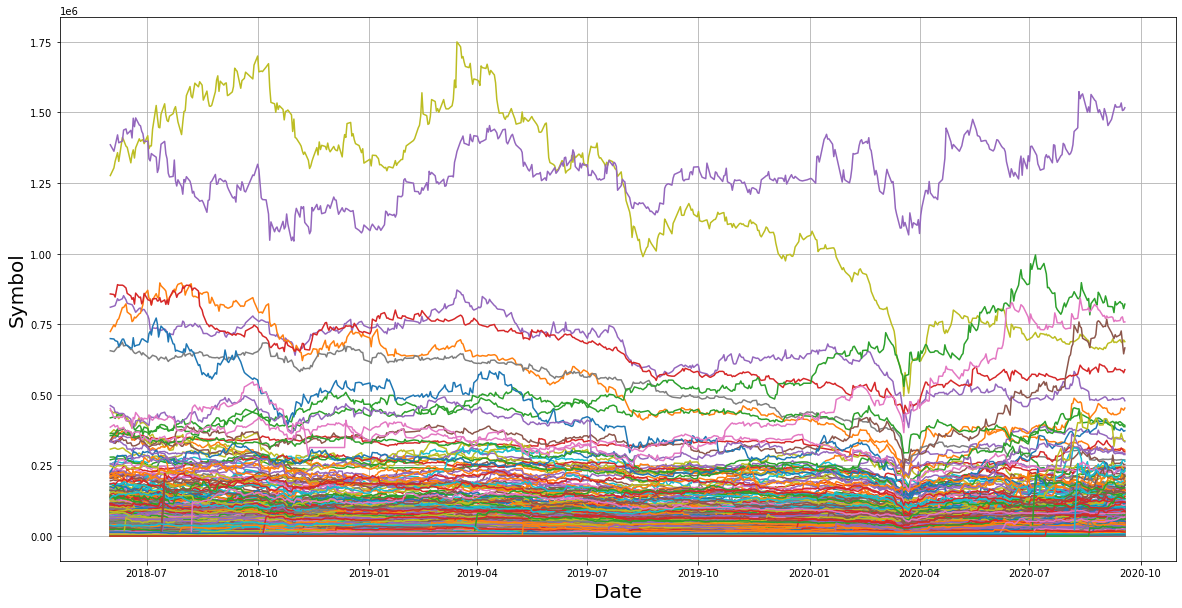

In [172]:
# 전체 Symbol 그래프
import seaborn as sns
plt.figure(figsize=(20, 10))
#plt.plot(stock_arr)
plt.plot(x, stock_arr[:,1:])

plt.xlabel('Date', size= 20); plt.ylabel('Symbol', size=20)
plt.grid()
plt.show()

In [ ]:
## 

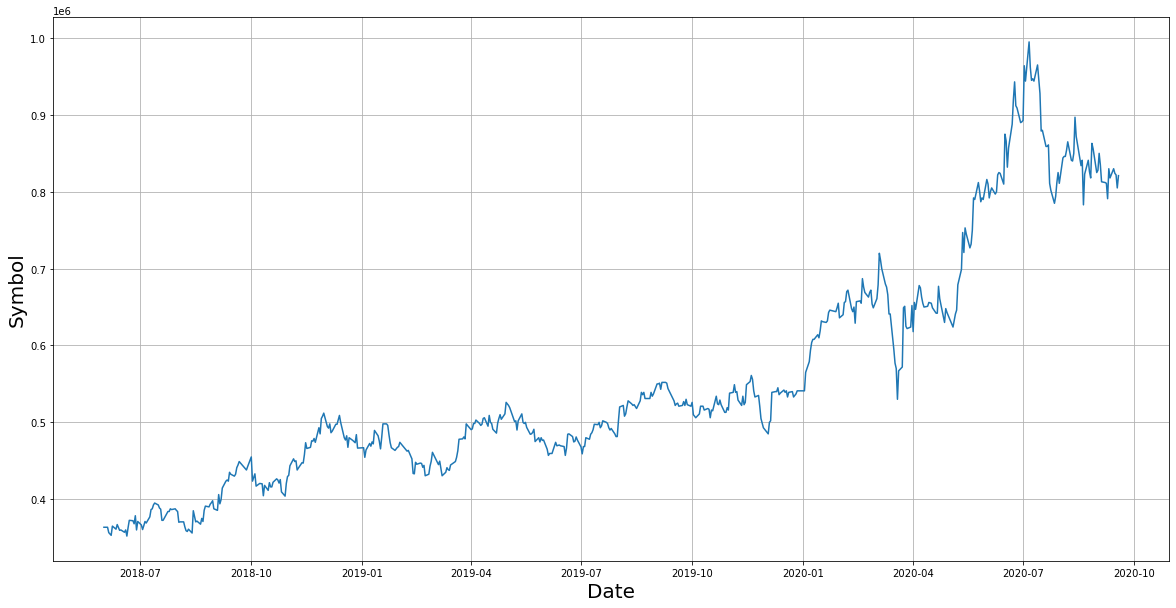

In [257]:
# plot() x, y 는 ndarray형태여야함
# ndarray는 DataFrame 처럼 컬럼을 label로 불러올 수 없다
import seaborn as sns
plt.figure(figsize=(20, 10))
#plt.plot(stock_arr)
plt.plot(x, stock_arr[:,793:794])

plt.xlabel('Date', size= 20); plt.ylabel('Symbol', size=20)
plt.grid()
plt.show()

- plotly 그래프

In [265]:


from plotly.subplots import make_subplots
import plotly.graph_objects as go

stock_name = 'Stock Price'
fig = go.Figure()
# , name = 'A000020', 'A000030', 'A000040', 
fig.add_trace(go.Scatter(x=x, y=stock_arr[:, 159], 
                        mode='lines+markers', line_color='gold', name='A003240'))
fig.add_trace(go.Scatter(x=x, y=stock_arr[:, 35], 
                        mode='lines+markers', line_color='violet', name='A000670'))
fig.add_trace(go.Scatter(x=x, y=stock_arr[:, 995], 
                        mode='lines+markers', line_color='blue', name='A051900'))
fig.add_trace(go.Scatter(x=x, y=stock_arr[:, 793], 
                        mode='lines+markers', line_color='green', name='A036570'))

fig.show()

In [83]:
stock_T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, Symbol to 2020-09-18
Columns: 2274 entries, 0 to 2273
dtypes: object(2274)
memory usage: 9.9+ MB


# 결론 (결론은 전체 Symbol 그래프와 plotly그래프 기반으로 작성 -> plotly 그래프는 따로 첨부된 png 파일을 참조해주세요.)
- 전체 Symbol 그래프를 보면 'A051900' 이 가장 안정적이다. 2020년 03월 ~ 04월에 거의 대부분 Symbol 주식가격이 하락했지만 'A051900'는 조금만 하락하고 2020년 07월 ~ 09월에 상승추세.
- 'A000670' 변화추이가 'A051900' 비슷하다 -> 2 Symbol이 연관 있을지도 모른다고 예상된다.
- plotly 그래프를 보면 'A003240' 2018년 6월 ~ 2019년 05까지 주식가격이 가장 높고 비교적 안정적이었는데 2019년 06월 12일부터 'A051900'보다 하락하고 2020년 03월까지 계속 하락. 이후 조금 상승했지만 다른 Symbol에 비해 변동성이 심하므로 'A003240' 주식가격이 더 상승할지 아니면 하락할지 알 수 없다.
- 'A036570' 2018년 06월부터 조금씩 상승하다가 2020년 07에 상승 -> 일시적 상승일 수 있으므로 2020년 하반기에도 상승할지 알 수없다.

## 날짜 기준으로 가격이 상승한 시점, 하락한 시점 보기 (전체 Symbol 기준 대체로 상승, 하락 시점)
- 전반적으로 주식가격이 상승한 시점 : 2018년 10월 // 2019년 3월 ~ 04월 // 2020년 07월
- 전반적으로 주식가격이 하락한 시점 : 2018년 10월 중반 // 2019년 07월 // 2020년 04월

## Symbol 중 증가, 감소 특징이 두드러진 Symbol 찾기
- 1) Symbol 'A003240' 
- 노란 그래프
- [상승] 2018년 09월 27일 ~ 2018년 10월 01일까지 상승
- [하락] 2018년 10월 01일 지난 다음부터 계속 하락하다가 2018년 11월 13일 최저로 하락하고 다시 상승하기 시작
- [상승] 2019년 03월 07일 ~ 2019년 03월 15일까지 상승
- [하락] 2019년 07월 29일부터 계속 하락 -> 2019년 8월 16일 최저까지 하락했다가 다시 상승
- [하락] 2020년 03월 05일 이후부터 계속 하락하다가 2020년 03월 19일 최저까지 하락했다가 다시 상승
- [소폭변동] 2020년 04월 이후 소폭으로 상승하거나 하락하다가 2020년 09월 10일 ~ 09월 18일까지 소폭변동.

2) Symbol 'A051900'
- 파란 그래프
- [상승] 2018년 06월 22일 최대까지 상승
- [하락] 2018년 10월 01일 소폭 상승했다가 2018년 10월 11일 최저까지 하락했다가 다시 상승하고 하락하고 반복으로 변동
- [상승] 상승하거나 하락하다가 2019년 04월 11일 최대까지 상승
- [하락] 2019년 08월 26일까지 하락
- [하락] 2020년 04월 01일까지 하락
- [상승] 2020년 08월 11까지 상승

3) Symbol 'A000670'
- 분홍 그래프
- [상승] 소폭으로 증가하고 감소하다가 2019년 03월 15일 최대까지 상승
- [하락] 2020년 03월 23일 최저까지 하락
- [상승] 다시 상승하다가 2020년 08월 07일까지 상승하다가 다시 하락

4) Symbol 'A036570'
- 녹색 그래프
- [상승] 2018년 06월 01일부터 조금씩 상승.
- [하락] 2020년 03월 19일 최저까지 하락
- [상승] 다시 상승하기 시작 -> 2020년 07월 06일 최대까지 상승 -> 다른 Symbol 중에서 (2020년 7월 ~ 8월에) 가장 두드러지게 상승.